In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
datasetPath = '../data/processed.cleveland.data'
colname = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
rawDataDf = pd.read_csv(datasetPath, header=None, names=colname, na_values=['?'])
print(rawDataDf.info())
print(rawDataDf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      

In [3]:
#Count Missing value
rowWithMissingValue = (rawDataDf.isna()
                       .sum(axis = 1)
                       .apply(lambda x : int(x != 0))
                       .sum()
                      )
print("Number of rows that contains at least on mising value: {}".format(rowWithMissingValue))

Number of rows that contains at least on mising value: 6


In [4]:
#Remove rows that contains at least on mising value
df_withoutMissingValue = rawDataDf.dropna()
print(df_withoutMissingValue.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null float64
thal        297 non-null float64
num         297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 34.8 KB
None


In [5]:
#Correct columns datatype
colDType = {'age': np.int32, 'sex': np.int16, 'cp': np.int16, 'fbs': np.int16, 'restecg': np.int16, 
           'exang': np.int16, 'slope':np.int16, 'ca': np.int16, 'thal':np.int16, 'num':np.int16}
convertedDf = df_withoutMissingValue.astype(colDType)
print(convertedDf.info())
print(convertedDf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int32
sex         297 non-null int16
cp          297 non-null int16
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null int16
restecg     297 non-null int16
thalach     297 non-null float64
exang       297 non-null int16
oldpeak     297 non-null float64
slope       297 non-null int16
ca          297 non-null int16
thal        297 non-null int16
num         297 non-null int16
dtypes: float64(4), int16(9), int32(1)
memory usage: 18.0 KB
None
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1     145.0  233.0    1        2    150.0      0      2.3   
1   67    1   4     160.0  286.0    0        2    108.0      1      1.5   
2   67    1   4     120.0  229.0    0        2    129.0      1      2.6   
3   37    1   3     130.0  250.0    0        0    187.0      0      3.5   
4   41    0 

In [6]:
#Change num col to be 0 when no heart disease and 1 when heart disease
convertedDf.num = convertedDf.num.apply(lambda x : int(x > 0))
print(convertedDf.head())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1     145.0  233.0    1        2    150.0      0      2.3   
1   67    1   4     160.0  286.0    0        2    108.0      1      1.5   
2   67    1   4     120.0  229.0    0        2    129.0      1      2.6   
3   37    1   3     130.0  250.0    0        0    187.0      0      3.5   
4   41    0   2     130.0  204.0    0        2    172.0      0      1.4   

   slope  ca  thal  num  
0      3   0     6    0  
1      2   3     3    1  
2      2   2     7    1  
3      3   0     3    0  
4      1   0     3    0  


In [7]:
#Sanity check

#3 (age)
#4 (sex) (0 = female, 1 = male)
#9 (cp) cp: chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
#10 (trestbps) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#12 (chol) chol: serum cholesterol in mg/dl
#16 (fbs) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#19 (restecg) restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#32 (thalach) halach: maximum heart rate achieved
#38 (exang) exercise induced angina (1 = yes; 0 = no)
#40 (oldpeak) oldpeak = ST depression induced by exercise relative to rest
#41 (slope) slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
#44 (ca) ca: number of major vessels (0-3) colored by flourosopy
#51 (thal) thaldur: duration of exercise test in minutes
badRowsIndexes = ((convertedDf.age <= 0) |                # Age smaller or equal to zero 
                 (~convertedDf.sex.isin([0, 1])) |        # sex is not in predefined values
                 (~convertedDf.cp.isin([1, 2, 3, 4])) |   # cp is no in the predefined value
                 (convertedDf.trestbps < 0) |             # Blood pressure smaller than zero
                 (convertedDf.chol < 0) |                 # Serum cholesterol smaller than zero
                 (~convertedDf.fbs.isin([0, 1])) |        # fsb not in predefined values
                 (~convertedDf.restecg.isin([0, 1, 2])) | # restecg not in predefined values
                 (convertedDf.thalach < 0) |              # thalach is smaller than zero
                 (~convertedDf.exang.isin([0, 1])) |      # exang not in predefined value
                 (convertedDf.oldpeak < 0) |              # oldpeak smaller than zero
                 (~convertedDf.slope.isin([1, 2, 3])) |   # slope not in predefined value
                 (~convertedDf.ca.isin([0, 1, 2, 3])) |   # ca not in predefined values
                 (convertedDf.thal < 0))                  # thal smaller than zero
badRows = convertedDf.loc[badRowsIndexes]
print(badRows.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
age         0 non-null int32
sex         0 non-null int16
cp          0 non-null int16
trestbps    0 non-null float64
chol        0 non-null float64
fbs         0 non-null int16
restecg     0 non-null int16
thalach     0 non-null float64
exang       0 non-null int16
oldpeak     0 non-null float64
slope       0 non-null int16
ca          0 non-null int16
thal        0 non-null int16
num         0 non-null int64
dtypes: float64(4), int16(8), int32(1), int64(1)
memory usage: 0.0 bytes
None


In [8]:
#Explode categorical features into {0, 1} values

#9 (cp) cp: chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
convertedDf['isTypicalAngineCp'] = convertedDf.cp.apply(lambda x: int(x == 1))
convertedDf['isATypicalAngineCp'] = convertedDf.cp.apply(lambda x: int(x == 2))
convertedDf['isNonAnginalPainCp'] = convertedDf.cp.apply(lambda x: int(x == 3))
convertedDf['isAsymptomaticCp'] = convertedDf.cp.apply(lambda x: int(x == 4))

#19 (restecg) restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
convertedDf['isNormalRestecg'] = convertedDf.restecg.apply(lambda x: int(x == 0))
convertedDf['hasStWaveRestecg'] = convertedDf.restecg.apply(lambda x: int(x == 1))
convertedDf['hasHypertrophyRestecg'] = convertedDf.restecg.apply(lambda x: int(x == 2))

#41 (slope) slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
convertedDf['isUpSlopping'] = convertedDf.slope.apply(lambda x: int(x == 1))
convertedDf['isFlatSlop'] = convertedDf.slope.apply(lambda x: int(x == 2))
convertedDf['isDownSlopping'] = convertedDf.slope.apply(lambda x: int(x == 3))

#Clean the original columns
explodedDataSetDf = convertedDf.drop(columns=['cp', 'restecg', 'slope'])
print(explodedDataSetDf.info())
print(explodedDataSetDf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 21 columns):
age                      297 non-null int32
sex                      297 non-null int16
trestbps                 297 non-null float64
chol                     297 non-null float64
fbs                      297 non-null int16
thalach                  297 non-null float64
exang                    297 non-null int16
oldpeak                  297 non-null float64
ca                       297 non-null int16
thal                     297 non-null int16
num                      297 non-null int64
isTypicalAngineCp        297 non-null int64
isATypicalAngineCp       297 non-null int64
isNonAnginalPainCp       297 non-null int64
isAsymptomaticCp         297 non-null int64
isNormalRestecg          297 non-null int64
hasStWaveRestecg         297 non-null int64
hasHypertrophyRestecg    297 non-null int64
isUpSlopping             297 non-null int64
isFlatSlop               297 non-null int64
isDownS

In [9]:
#Split data into training, validation and test set
dataColumns = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 
              'ca', 'thal', 'isTypicalAngineCp', 'isATypicalAngineCp', 'isNonAnginalPainCp', 
              'isAsymptomaticCp', 'isNormalRestecg', 'hasStWaveRestecg', 'hasHypertrophyRestecg', 
              'isUpSlopping', 'isFlatSlop', 'isDownSlopping']
npData = explodedDataSetDf[dataColumns].values
npLabels = explodedDataSetDf.num.values
print(npData.shape)
print(npLabels.shape)

(297, 20)
(297,)


In [10]:
datasetSize = npData.shape[0]
testDataSize = (datasetSize * 15) // 100
indexes = np.arange(datasetSize)
np.random.seed(seed=18)
np.random.shuffle(indexes)

testDataIndexes = indexes[0:testDataSize]
validationDataIndexes = indexes[testDataSize:2*testDataSize]
trainDataIndexes = indexes[2*testDataSize:datasetSize]

testData = npData[testDataIndexes]
testLabels = npLabels[testDataIndexes]

validationData = npData[validationDataIndexes]
validationLabels = npLabels[validationDataIndexes]

trainData = npData[trainDataIndexes]
trainLabels = npLabels[trainDataIndexes]

print("Test data shape is {} and Test labels shape is {}".format(testData.shape, testLabels.shape))
print("Validation data shape is {} and Validation labels shape is {}"
      .format(validationData.shape, validationLabels.shape))
print("Train data shape is {} and Train labels shape is {}".format(trainData.shape, trainLabels.shape))

Test data shape is (44, 20) and Test labels shape is (44,)
Validation data shape is (44, 20) and Validation labels shape is (44,)
Train data shape is (209, 20) and Train labels shape is (209,)


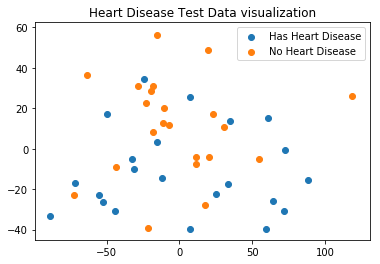

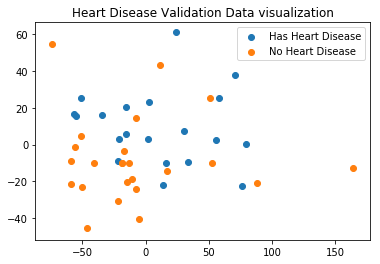

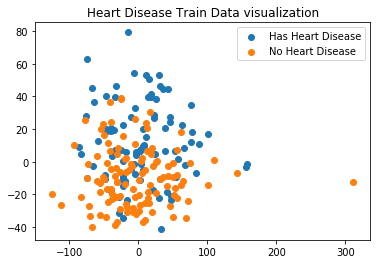

In [11]:
#Data visualization with PCA on the test set
def visualizeData(data, labels, title) :
    pca_obj = PCA(n_components=2)
    pc_test = pca_obj.fit_transform(data)

    hasHeartDiseaseIndexes = labels == 1
    hasNotHeartDiseaseIndexes = labels == 0

    plt.scatter(pc_test[hasHeartDiseaseIndexes, 0], pc_test[hasHeartDiseaseIndexes, 1], label="Has Heart Disease")
    plt.scatter(pc_test[hasNotHeartDiseaseIndexes, 0], pc_test[hasNotHeartDiseaseIndexes, 1], label="No Heart Disease")

    plt.legend()
    plt.title(title)
    plt.show()

visualizeData(testData, testLabels, "Heart Disease Test Data visualization")
visualizeData(validationData, validationLabels, "Heart Disease Validation Data visualization")
visualizeData(trainData, trainLabels, "Heart Disease Train Data visualization")

In [12]:
#We can see that our dataset contains few outliers. As we don't have enough data, 
#we will not throw away the outliers but instead we will perform a robust scaling to avoid the outliers effects
robustScaler = RobustScaler()
rb_trainData = robustScaler.fit_transform(trainData)
rb_validationData = robustScaler.transform(validationData)
rb_testData = robustScaler.transform(testData)

#Data standardization with sklearn
standardizer = StandardScaler()
st_trainData = standardizer.fit_transform(rb_trainData)
st_validationData = standardizer.transform(rb_validationData)
st_testData = standardizer.transform(rb_testData)

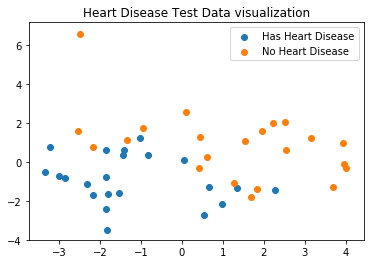

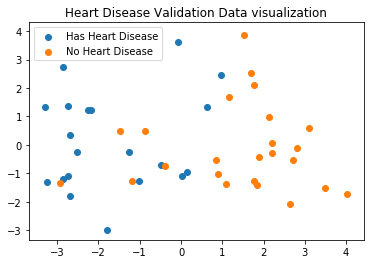

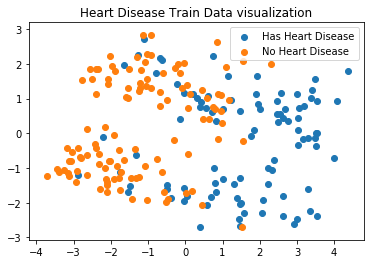

In [13]:
#Visualize data after Robust scaling and standardization
#We can see that the data is more separable after transformation
visualizeData(st_testData, testLabels, "Heart Disease Test Data visualization")
visualizeData(st_validationData, validationLabels, "Heart Disease Validation Data visualization")
visualizeData(st_trainData, trainLabels, "Heart Disease Train Data visualization")

In [14]:
#Save Data with Pickle
dataDict = {"testData": st_testData, 
           "testLabels": testLabels, 
           "validationData": st_validationData, 
           "validationLabels": validationLabels, 
           "trainData": st_trainData, 
           "trainLabels": trainLabels}
savedPath = "../data/splittedData.pickle"
with open(savedPath, 'wb') as handle:
    pickle.dump(dataDict, handle, protocol=pickle.HIGHEST_PROTOCOL)